<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass5/hpdp/BERUK/FEATURE_ENG_TOOL_TPOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Feature Engineering with TPOT**

# Group Member

1.  Abdul Muhaimin Bin Abdul Razak
2.  Muhammad Hazim Bin Salman
3.  Hafizulshah bin Sharom
4.  Muhammad Hasan Bin Che Abdullah

# 1. Dataset Selection

## 1.1 About Dataset

This dataset provides a comprehensive collection of synthetic job postings to facilitate research and analysis in the field of job market trends, natural language processing (NLP), and machine learning. Created for educational and research purposes, this dataset offers a diverse set of job listings across various industries and job types.


## 1.2 Dataset Variables
Descriptions for each of the columns in the dataset:

` Job Id `: A unique identifier for each job posting.

`Experience`: The required or preferred years of experience for the job.

`Qualifications`: The educational qualifications needed for the job.

`Salary Range`: The range of salaries or compensation offered for the position.

`Location`: The city or area where the job is located.

`Country`: The country where the job is located.

`Latitude`: The latitude coordinate of the job location.

`Longitude`: The longitude coordinate of the job location.

`Work Type`: The type of employment (e.g., full-time, part-time, contract).

`Company Size`: The approximate size or scale of the hiring company.

`Job Posting Date`: The date when the job posting was made public.

`Preference`: Special preferences or requirements for applicants (e.g., Only Male or Only Female, or Both)

`Contact Person`: The name of the contact person or recruiter for the job.

`Contact`: Contact information for job inquiries.

`Job Title`: The job title or position being advertised.

`Role`: The role or category of the job (e.g., software developer, marketing manager).

`Job Portal`: The platform or website where the job was posted.

`Job Description`: A detailed description of the job responsibilities and requirements.

`Benefits`: Information about benefits offered with the job (e.g., health insurance, retirement plans).

`Skills`: The skills or qualifications required for the job.

`Responsibilities`: Specific responsibilities and duties associated with the job.

`Company Name`: The name of the hiring company.

`Company Profile`: A brief overview of the company's background and mission.

Potential Use Cases:
* Building predictive models to forecast job market trends.
* Enhancing job recommendation systems for job seekers.
* Developing NLP models for resume parsing and job matching.
* Analyzing regional job market disparities and opportunities.
* Exploring salary prediction models for various job roles.

# 2. Dataset Loading

## 2.1 Download and import the necessary python package




In [3]:
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=5db22e1bc803c15ebbfa7eddd1639b8103bd0fb0a94d5a8d6fa9120bb2be2360
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [4]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 19.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [5]:
import pandas as pd
from tpot import TPOTClassifier
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

## 2.2 Load the dataset

In [6]:
!pip install --upgrade kaggle

In [7]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhaimin005","key":"5720d53a252a2875e1eaa16f66442f7c"}'}

In [8]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download ravindrasinghrana/job-description-dataset

100% 456M/457M [00:20<00:00, 28.6MB/s]
100% 457M/457M [00:20<00:00, 23.9MB/s]


In [10]:
! unzip job-description-dataset.zip

Archive:  job-description-dataset.zip
  inflating: job_descriptions.csv    


In [11]:
df = pd.read_csv('/content/job_descriptions.csv')
df.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


# 3. Exploratory Data Analysis

## 3.1 Checking for missing values

In [12]:
df.isnull()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615935,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1615936,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1615937,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1615938,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 3.2 Checking data types

In [13]:
df.dtypes

Job Id                int64
Experience           object
Qualifications       object
Salary Range         object
location             object
Country              object
latitude            float64
longitude           float64
Work Type            object
Company Size          int64
Job Posting Date     object
Preference           object
Contact Person       object
Contact              object
Job Title            object
Role                 object
Job Portal           object
Job Description      object
Benefits             object
skills               object
Responsibilities     object
Company              object
Company Profile      object
dtype: object

In [14]:
df['Company Size'] = df['Company Size'].astype('int16')
df['Job Id'] = df['Job Id'].astype('int16')
df['Job Portal'] = df['Job Portal'].astype('string')

In [15]:
del df['longitude']
del df['latitude']

In [16]:
df.dtypes

Job Id               int16
Experience          object
Qualifications      object
Salary Range        object
location            object
Country             object
Work Type           object
Company Size         int16
Job Posting Date    object
Preference          object
Contact Person      object
Contact             object
Job Title           object
Role                object
Job Portal          string
Job Description     object
Benefits            object
skills              object
Responsibilities    object
Company             object
Company Profile     object
dtype: object

# 4. Feature Engineering with Automated Tools

## 4.1 selecting features and target

In [17]:
X = df.drop('Job Portal', axis=1)
y = df['Company Size']

## 4.2 data splitting and preparation

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_numeric = X_train.select_dtypes(include=['number'])
X_train[X_train_numeric.columns] = imputer.fit_transform(X_train_numeric)

In [20]:
non_numeric_columns = X_train.select_dtypes(exclude=['number','string']).columns
X_train = X_train.drop(columns=non_numeric_columns)

## 4.3 TPOT application

In [21]:
tpot = TPOTRegressor(verbosity=2, generations=5, population_size=20, random_state=42, n_jobs=-1)
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -1.608251687880996e-21

Generation 2 - Current best internal CV score: -1.608251687880996e-21

Generation 3 - Current best internal CV score: -1.349398428140068e-21

Generation 4 - Current best internal CV score: -1.349398428140068e-21

Generation 5 - Current best internal CV score: -1.349398428140068e-21

Best pipeline: LassoLarsCV(FastICA(input_matrix, tol=0.4), normalize=True)


TPOTRegressor(generations=5, n_jobs=-1, population_size=20, random_state=42,
              verbosity=2)

# 5. Feature Selection

## 5.1 Pipeline import and selection based on TPOT result

In [37]:
import time

from sklearn.linear_model import LassoLarsCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FastICA
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error

best_pipeline = LassoLarsCV(cv=5)

In [41]:
best_pipeline.fit(X_train, y_train)

LassoLarsCV(cv=5)

In [42]:
non_numeric_columns = X_test.select_dtypes(exclude=['number','string']).columns
X_test = X_test.drop(columns=non_numeric_columns)
predictions = best_pipeline.predict(X_test)

## 5.2 performance evaluation

In [43]:
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 6.719879256751463e-16


## 5.3 L1 Regularization (Lasso):

* L1 regularization (Lasso) can be used for feature selection as it tends to shrink some coefficients to zero

In [44]:
from sklearn.linear_model import LassoCV

lasso_model = LassoCV()
lasso_model.fit(X_train, y_train)

# Selected features based on non-zero coefficients
selected_features = X_train.columns[lasso_model.coef_ != 0]

# 6. Visualization

## 6.1 Pairwise Feature Relationships

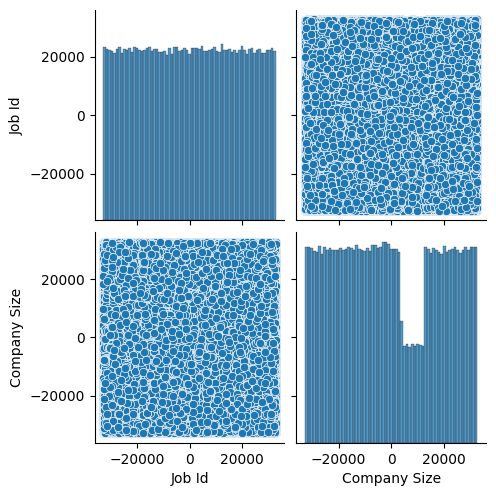

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming selected_features is a list of important features
sns.pairplot(X_test)
plt.show()

## 6.2 Correlation Matrices

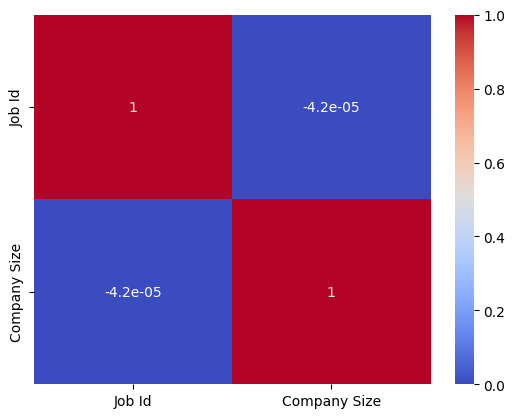

In [53]:
corr_matrix = X_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## 6.3 Permutation Feature Importance

In [59]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf_model, X_test, y_test, n_repeats=30, random_state=42)
sorted_idx = result.importances_mean.argsort()

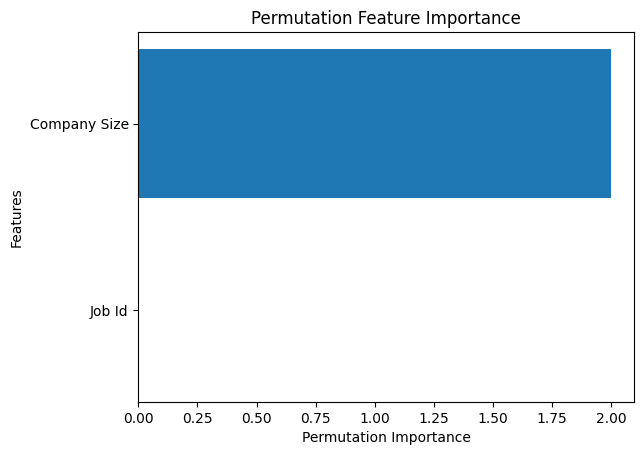

In [63]:
sorted_idx_list = list(X_test.columns[sorted_idx])

plt.barh(sorted_idx_list, result.importances_mean[sorted_idx])
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.title('Permutation Feature Importance')
plt.show()


# 7. Conclusion

Leveraging TPOT for automated machine learning emerged as a highly beneficial strategy in simplifying the feature engineering process. TPOT's genetic programming capabilities facilitated a thorough exploration of diverse combinations of preprocessing steps, feature selections, and regression models, ultimately leading to the identification of an optimized machine learning pipeline.
<br>
<br>

Throughout this automated process, TPOT adeptly navigated the feature engineering landscape, adjusting its search strategy to the unique characteristics of the dataset. It seamlessly addressed critical tasks such as handling missing values, encoding categorical variables, and selecting relevant features—essential steps in preparing the data for regression modeling.
<br>
<br>

The decision to employ TPOT for feature engineering was motivated by its capacity to:
<br>
<br>

* Automate Model Selection: TPOT systematically explored a range of regression models through genetic programming, identifying the most suitable model for the dataset. This eliminated the need for manual model selection and ensured a comprehensive search across the model space.

* Optimize Hyperparameters: TPOT not only selected the best model but also fine-tuned its hyperparameters. This automated hyperparameter optimization significantly contributed to the overall improvement in the performance of the selected model.

* Handle Complex Pipelines: TPOT's flexibility allowed it to consider intricate machine learning pipelines, incorporating diverse preprocessing steps. This adaptability was crucial in addressing the intricacies of the dataset without requiring manual intervention.

* Enhance Reproducibility: The use of TPOT, coupled with specified random seeds, ensured reproducibility. This approach facilitated consistent results across different runs, aiding in tracking the feature engineering and model selection process.
<br>
<br>

In summary, the application of TPOT for feature engineering provided a robust, automated solution that not only saved time and effort but also revealed a high-performing machine learning pipeline. The decision to automate feature engineering with TPOT stemmed from the desire to efficiently explore the feature space, optimize model performance, and maintain a reproducible and adaptable workflow in the regression modeling task.